C:\Users\shams\AppData\Local\Temp\ipykernel_11392\1938252247.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_real[i] = np.trapz(signal * cosine_term, sampled_times)
C:\Users\shams\AppData\Local\Temp\ipykernel_11392\1938252247.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_imag[i] =- np.trapz(signal * sine_term, sampled_times)


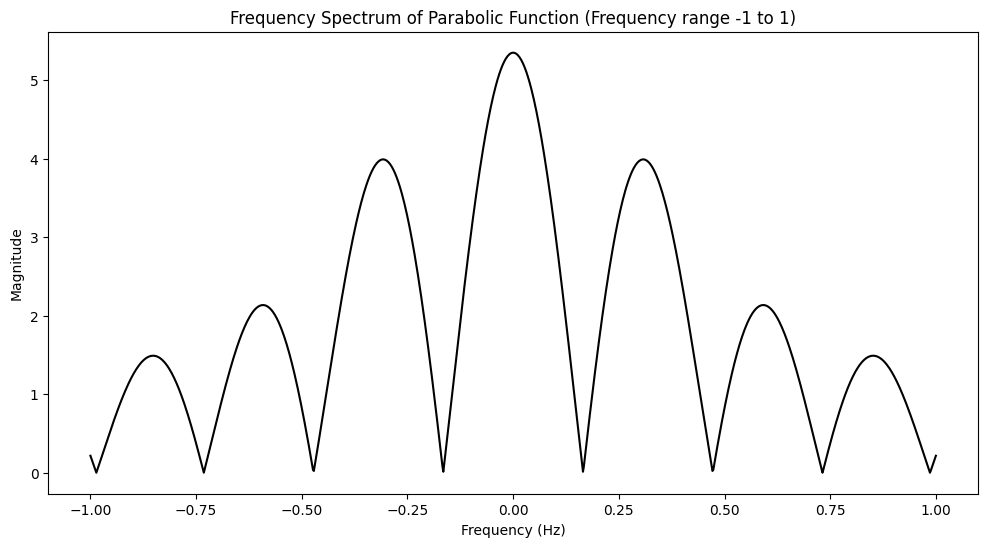

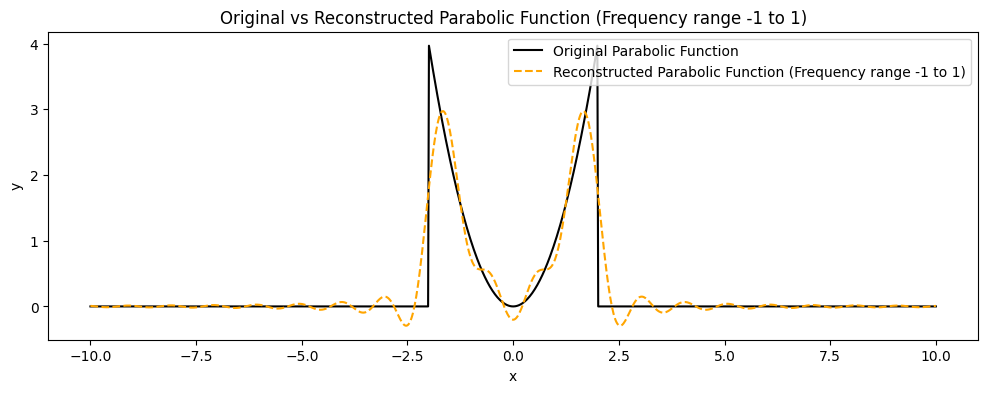

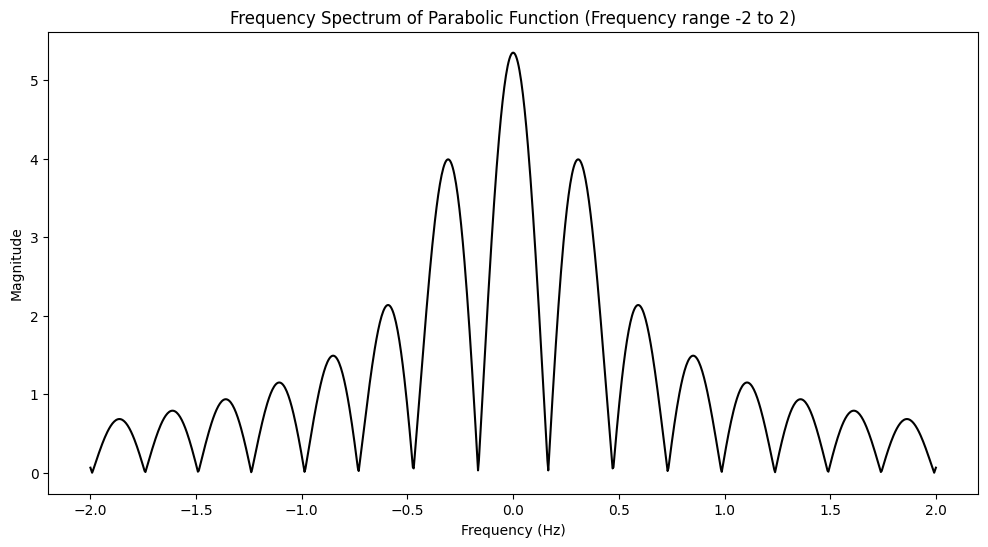

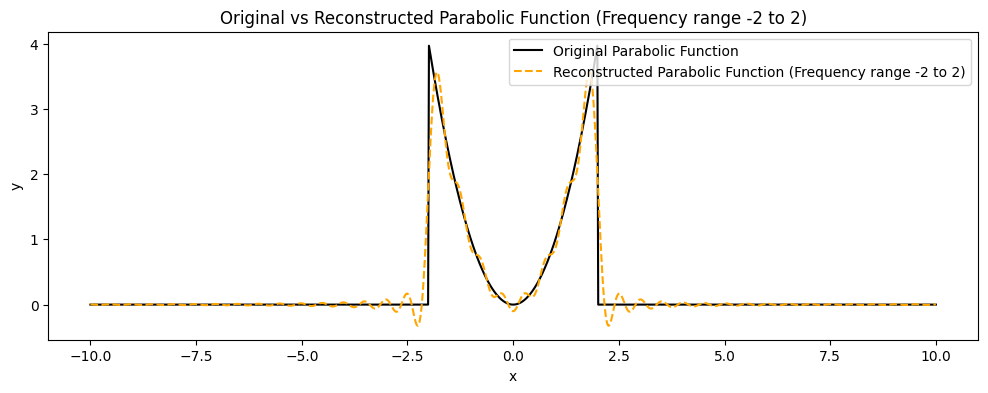

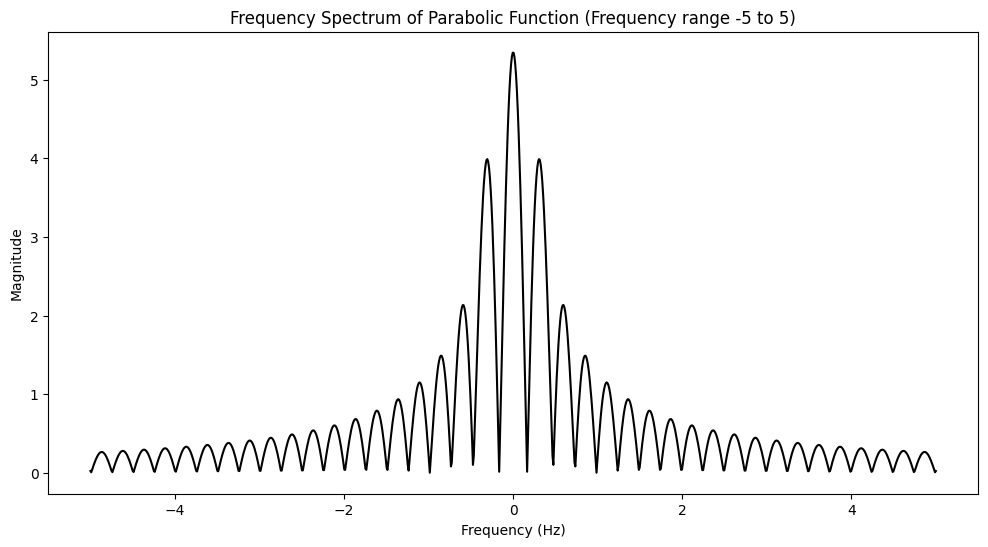

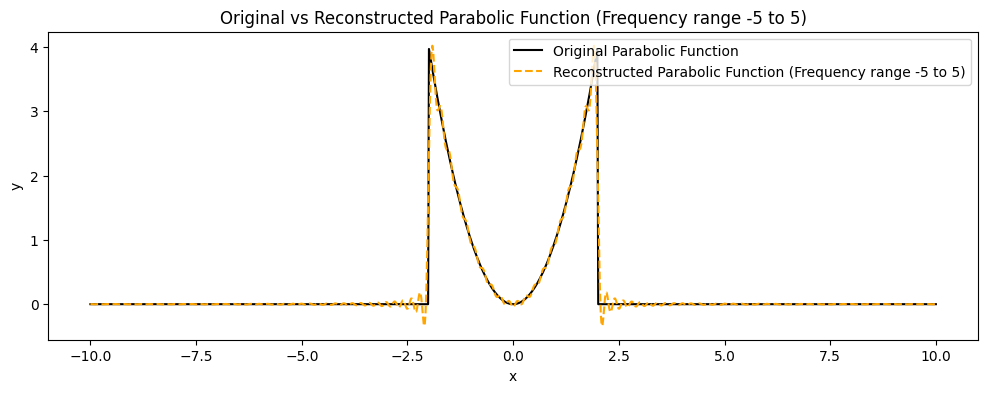

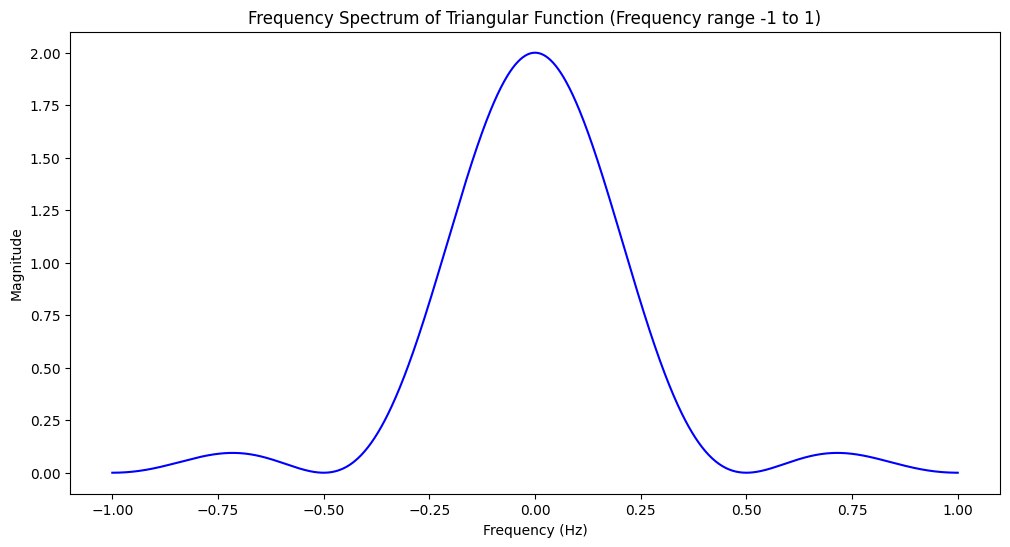

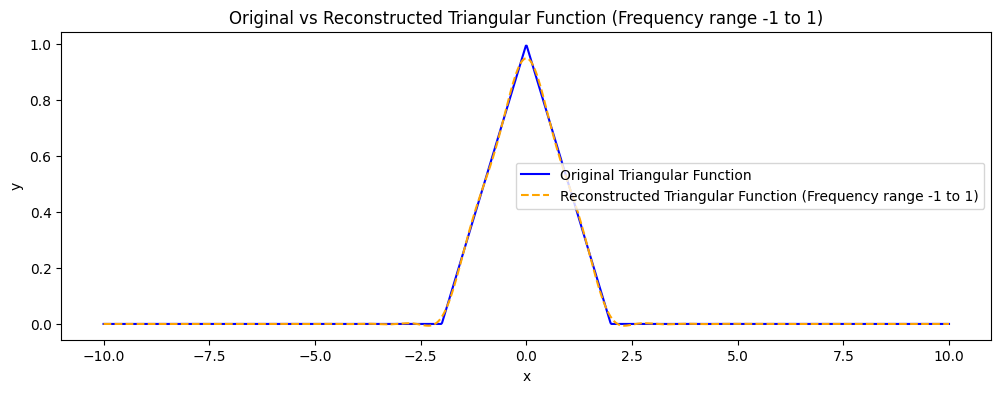

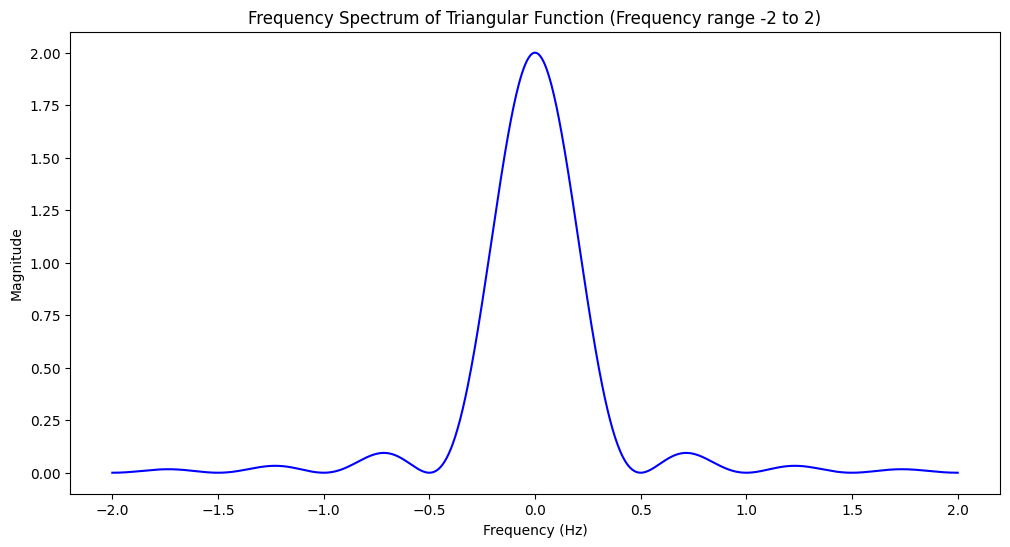

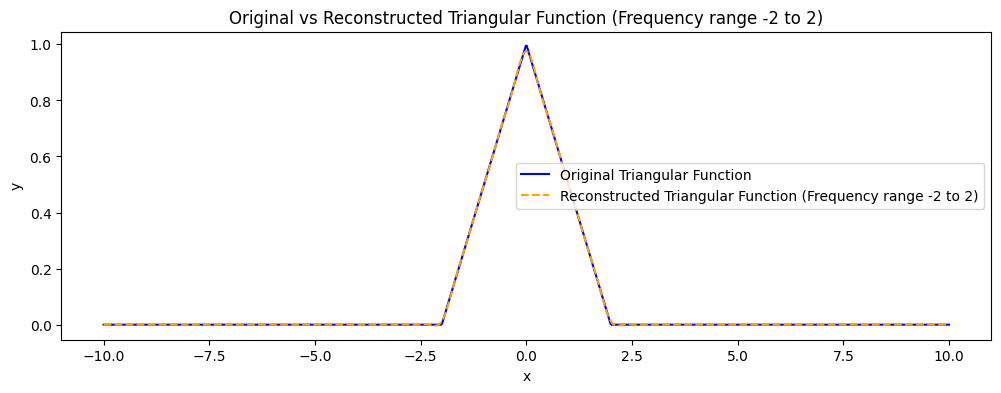

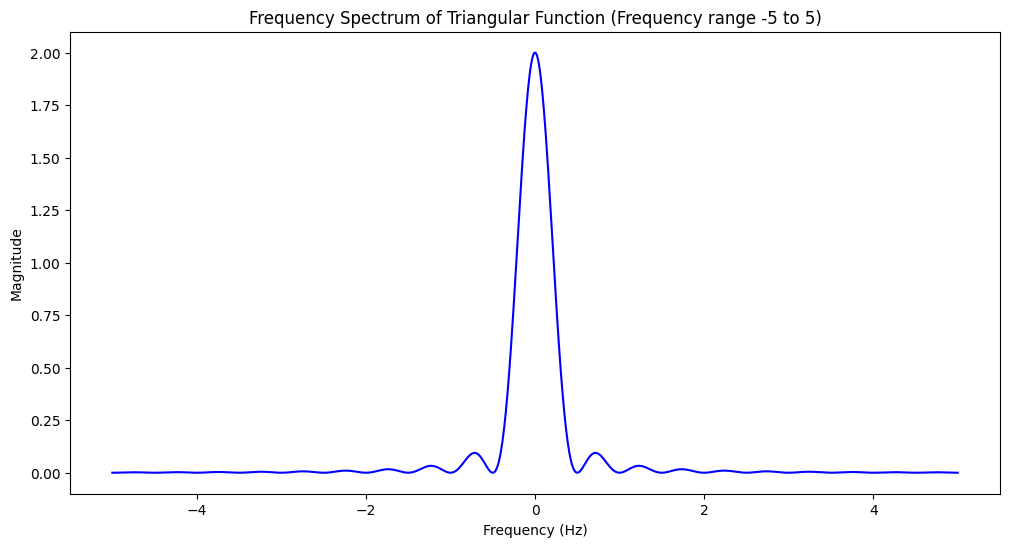

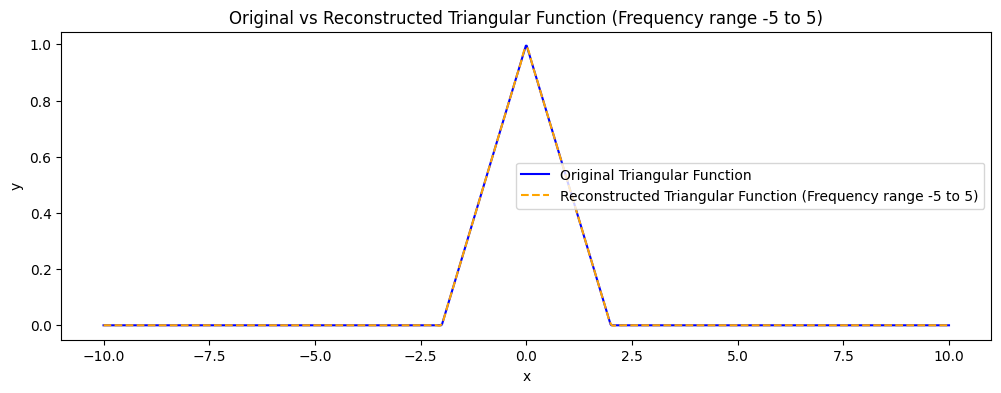

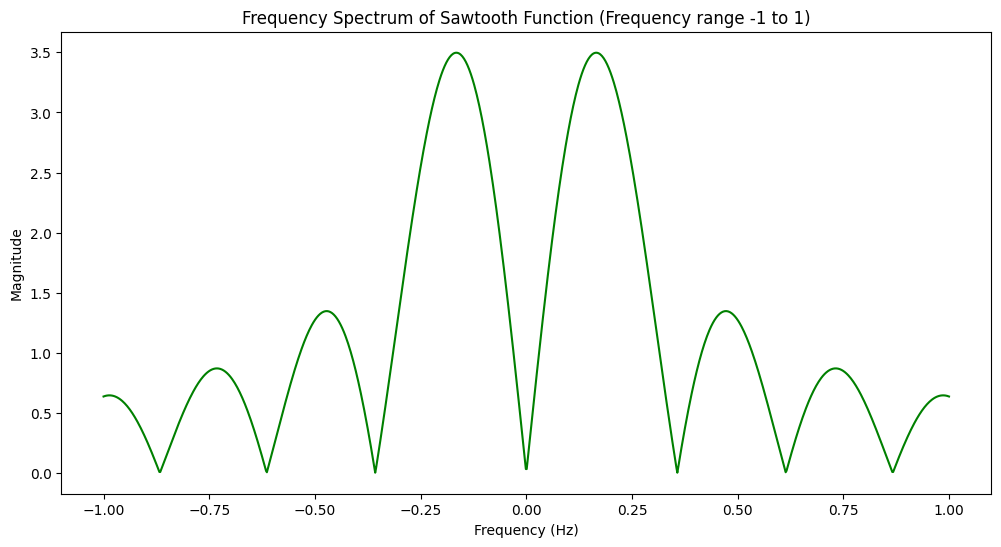

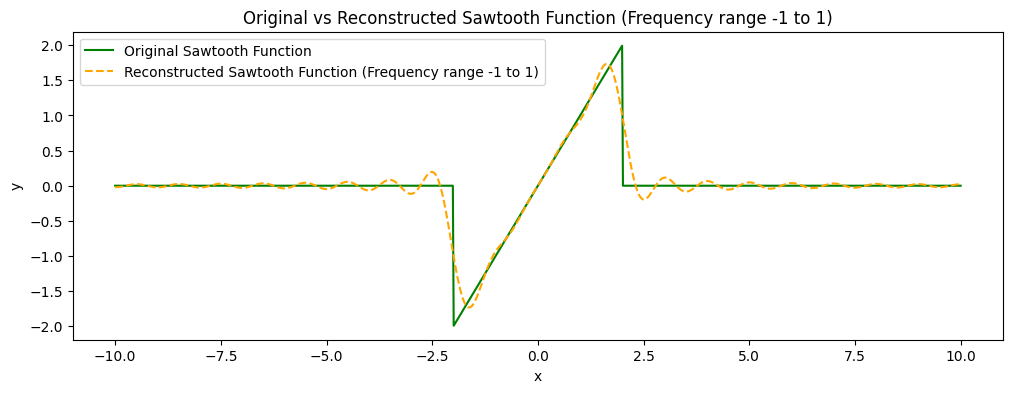

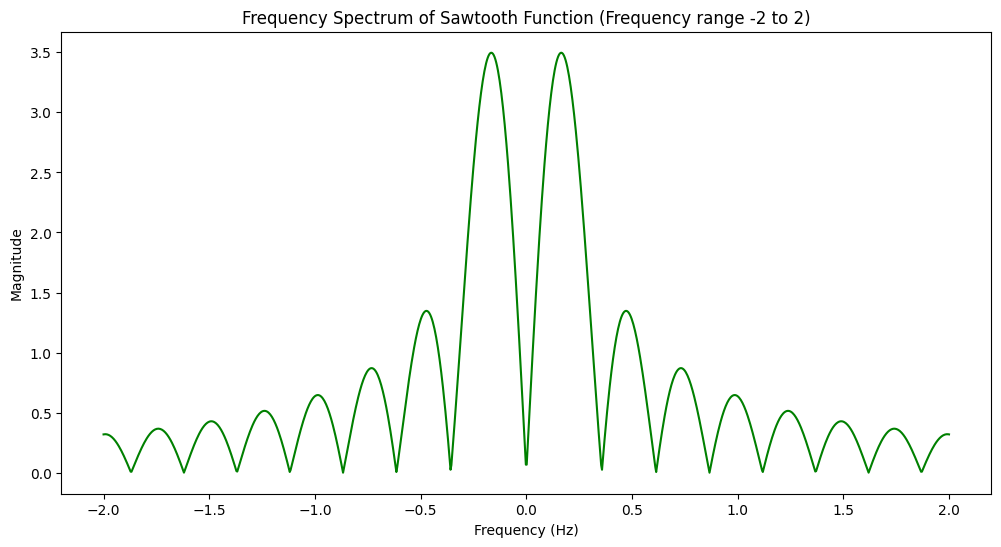

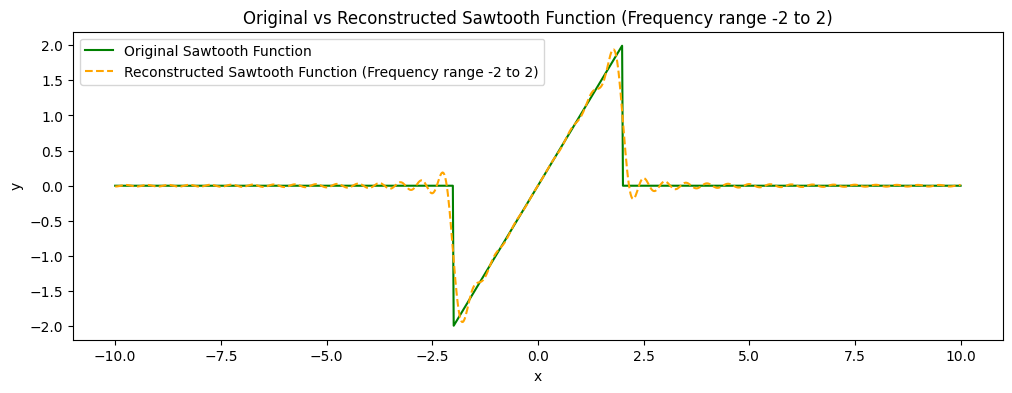

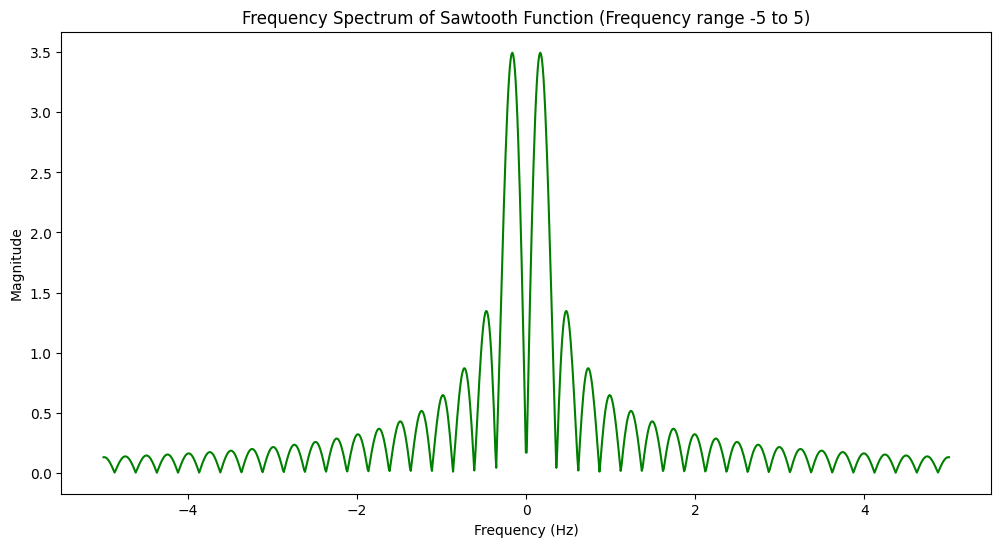

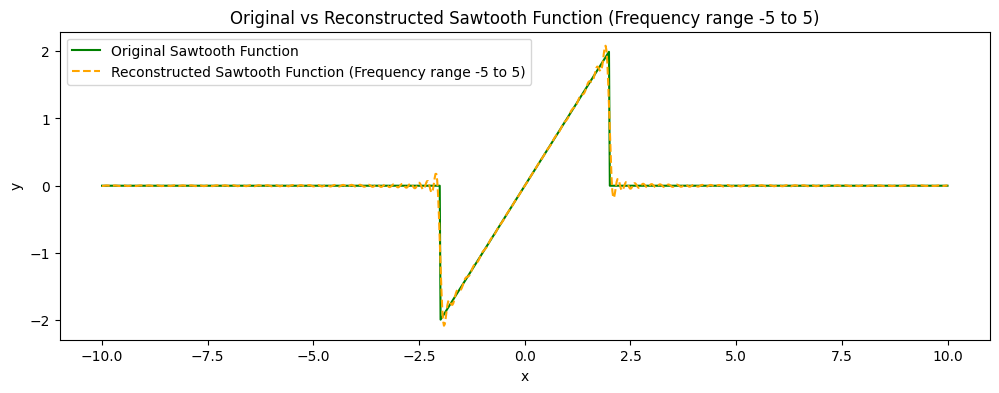

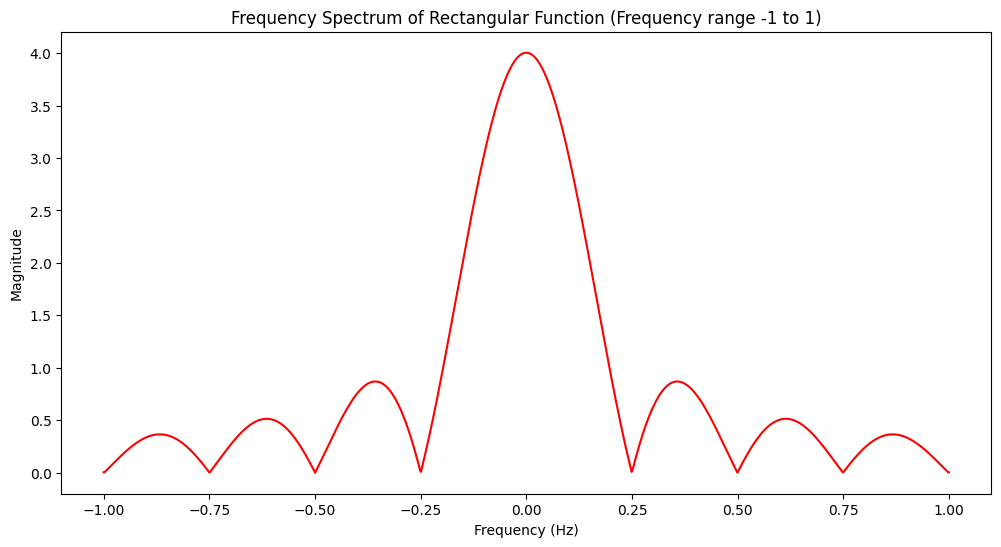

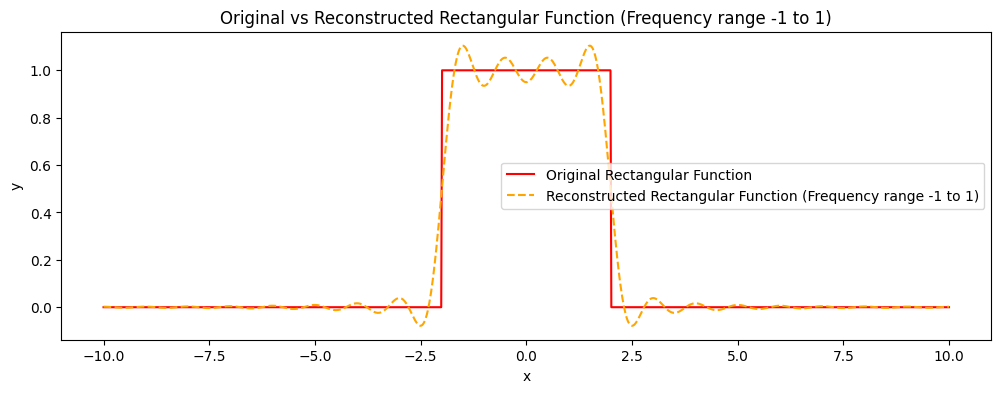

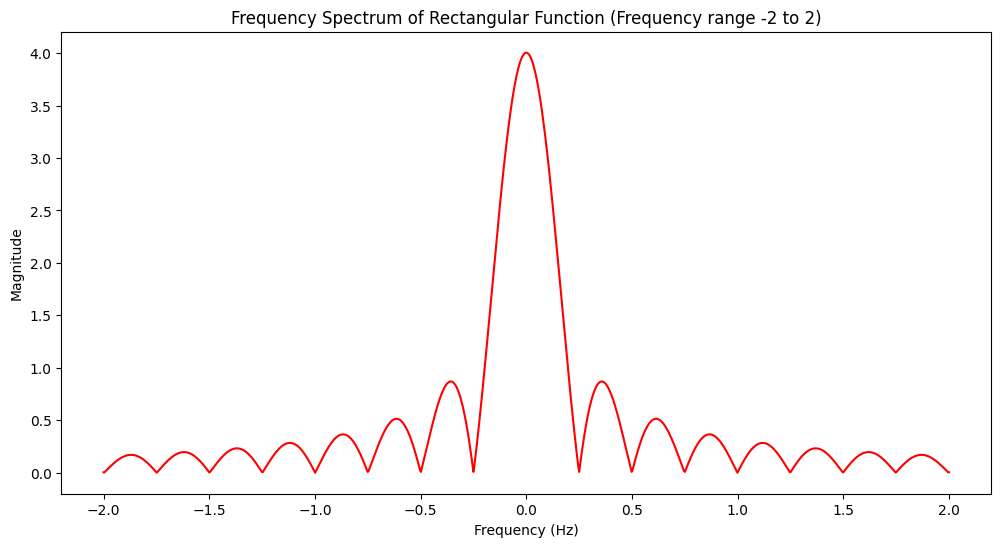

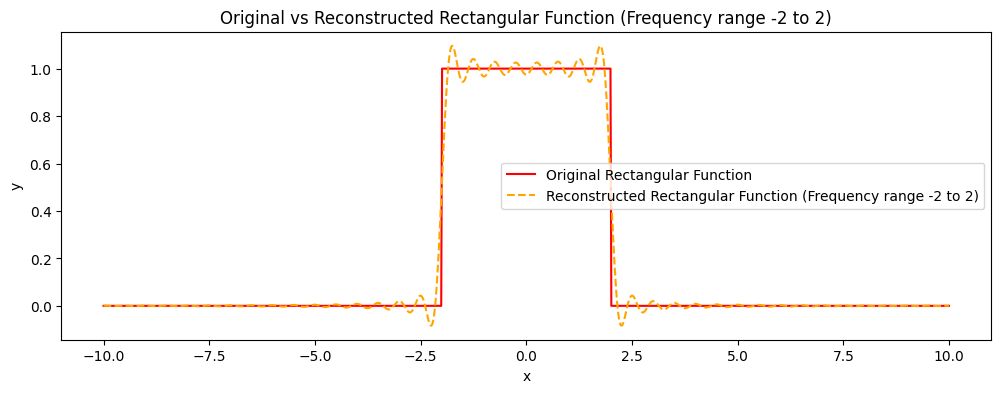

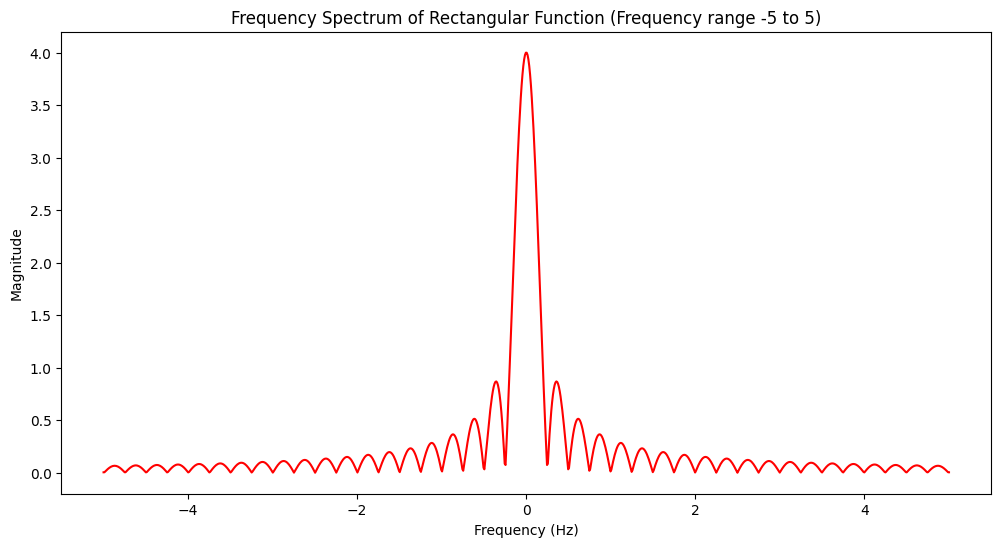

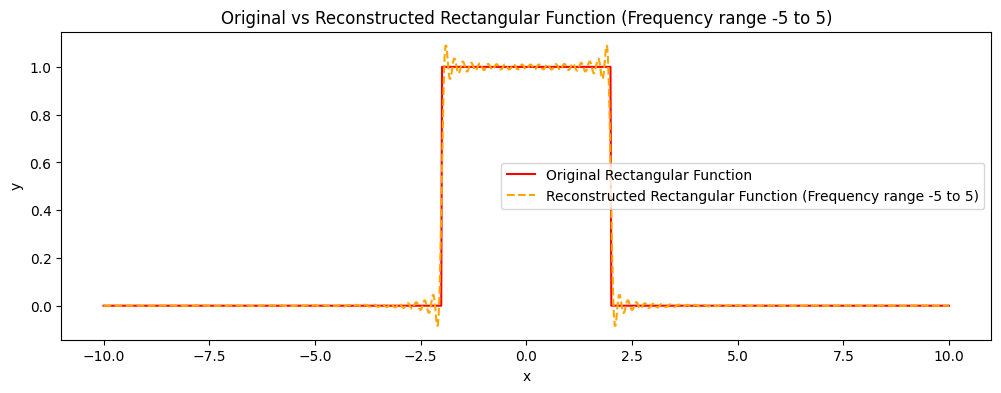

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions
def parabolic_function(x_values):
    """Create a parabolic function y = x^2 within [-2, 2], 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), x_values**2, 0)

def triangular_function(x_values):
    """Triangular wave within [-2, 2] with height 1, 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), 1 - np.abs(x_values) / 2, 0)

def sawtooth_function(x_values):
    """Sawtooth wave with slope 1 within [-2, 2], and 0 elsewhere, only one wave from -2 to 2."""
    return np.where((x_values >= -2) & (x_values <= 2), x_values, 0)

def rectangular_function(x_values):
    """Rectangular pulse within [-2, 2] with height 1, 0 elsewhere."""
    return np.where((x_values >= -2) & (x_values <= 2), 1, 0)

def fourier_transform(signal, frequencies, sampled_times):
    """Compute the Fourier Transform of a signal using trapezoidal integration."""
    num_freqs = len(frequencies)
    ft_result_real = np.zeros(num_freqs)
    ft_result_imag = np.zeros(num_freqs)
    
    for i, freq in enumerate(frequencies):
        cosine_term = np.cos(2 * np.pi * freq * sampled_times)
        sine_term = np.sin(2 * np.pi * freq * sampled_times)
        ft_result_real[i] = np.trapz(signal * cosine_term, sampled_times)
        ft_result_imag[i] =- np.trapz(signal * sine_term, sampled_times)
    
    return ft_result_real, ft_result_imag

def inverse_fourier_transform(ft_signal, frequencies, sampled_times):
    """Reconstruct the signal using the Inverse Fourier Transform."""
    n = len(sampled_times)
    reconstructed_signal = np.zeros(n)
    
    for i, t in enumerate(sampled_times):
        real_part = np.sum(ft_signal[0] * np.cos(2 * np.pi * frequencies * t))
        imag_part = np.sum(ft_signal[1] * np.sin(2 * np.pi * frequencies * t))
        reconstructed_signal[i] = (real_part - imag_part) * (frequencies[1] - frequencies[0])
    
    return reconstructed_signal

x_values = np.linspace(-10, 10, 1000)
y_values = parabolic_function(x_values)

frequency_ranges = [1, 2, 5]
functions = [
    ("Parabolic Function", y_values, "black"),
    ("Triangular Function", triangular_function(x_values), "blue"),
    ("Sawtooth Function", sawtooth_function(x_values), "green"),
    ("Rectangular Function", rectangular_function(x_values), "red")
]

for func_name, func_values, color in functions:
    for freq_limit in frequency_ranges:
        frequencies = np.linspace(-freq_limit, freq_limit, 1000)
        sampled_times = x_values
        
        ft_data = fourier_transform(func_values, frequencies, sampled_times)
        
        plt.figure(figsize=(12, 6))
        plt.plot(frequencies, np.sqrt(ft_data[0]**2 + ft_data[1]**2), color=color)
        plt.title(f"Frequency Spectrum of {func_name} (Frequency range -{freq_limit} to {freq_limit})")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.show()
        
        reconstructed_func_values = inverse_fourier_transform(ft_data, frequencies, sampled_times)
        
        plt.figure(figsize=(12, 4))
        plt.plot(x_values, func_values, label=f"Original {func_name}", color=color)
        plt.plot(sampled_times, reconstructed_func_values, label=f"Reconstructed {func_name} (Frequency range -{freq_limit} to {freq_limit})", color="orange", linestyle="--")
        plt.title(f"Original vs Reconstructed {func_name} (Frequency range -{freq_limit} to {freq_limit})")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
